In [1]:
from __future__ import division, print_function
from IPython.display import display, Math, Latex

from salishsea_tools import (
    nc_tools,
    viz_tools,
)


%matplotlib inline

import numpy as np
import datetime as dtm
import netCDF4 as nc
import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.io as sio


%matplotlib inline

In [2]:
mesh = nc.Dataset('/mnt/storage0/jacquielee/research/data/Jasper/mesh_mask_anha4_201509.nc')
mask = mesh.variables['tmask'][0]
bathy = ma.array(mesh.variables['mbathy'][0],mask=(mask[0,:,:]-1)*-1)
zlevels=mesh.variables['gdept_0'][0]
lat=mesh.variables['nav_lat']
lon=mesh.variables['nav_lon']

In [3]:
grid = nc.Dataset('/home/jacquielee/data/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy = grid.variables['Bathymetry'][:]
bathy = ma.masked_values(bathy[:],0)
bathy = ma.masked_where(bathy[:,:]>4500,bathy)

In [4]:
slj = '/mnt/storage0/jacquielee/research/tools/secFlux/ANHA4-VJT002/'
polzin ='/mnt/storage0/jacquielee/research/tools/TRANSPORTS/secFlux/ANHA4-VJT003/'
control = '/mnt/storage0/jacquielee/research/tools/TRANSPORTS/secFlux/ANHA4-EXH005/'
control2 = '/mnt/storage0/jacquielee/research/tools/secFlux/ANHA4-EXH005/'

In [5]:
# transect files
sj = 'ANHA4-VJT002_2002_2015.mat'
c = 'ANHA4-EXH005_2002_2016.mat'
p = 'ANHA4-VJT003_2002_2016.mat'

nares = 'NaresStrait_'
jones = 'JonesSound_'
fram = 'FramStrait_'
barrow = 'BarrowStrait_'
davis = 'DavisStrait_'
osnap = 'OSNAP_'
bso = 'BSO_'


In [6]:
OSNAPt = sio.loadmat('/mnt/storage0/jacquielee/research/tools/TRANSPORTS/evaluation/secIndex/ANHA4-OSNAPIndex.mat')['secInfo']
OSNAPlon = OSNAPt['fluxLon'][0,0]
OSNAPlat = OSNAPt['fluxLat'][0,0]

Barrowt = sio.loadmat('/mnt/storage0/jacquielee/research/tools/TRANSPORTS/evaluation/secIndex/ANHA4-BarrowStraitIndex.mat')['secInfo']
Barrowlon = Barrowt['fluxLon'][0,0]
Barrowlat = Barrowt['fluxLat'][0,0]

Narest = sio.loadmat('/mnt/storage0/jacquielee/research/tools/TRANSPORTS/evaluation/secIndex/ANHA4-NaresStraitIndex.mat')['secInfo']
Nareslon = Narest['fluxLon'][0,0]
Nareslat = Narest['fluxLat'][0,0]

Jonest = sio.loadmat('/mnt/storage0/jacquielee/research/tools/TRANSPORTS/evaluation/secIndex/ANHA4-JonesSoundIndex.mat')['secInfo']
Joneslon = Jonest['fluxLon'][0,0]
Joneslat = Jonest['fluxLat'][0,0]

Davist = sio.loadmat('/mnt/storage0/jacquielee/research/tools/TRANSPORTS/evaluation/secIndex/ANHA4-DavisStraitIndex.mat')['secInfo']
Davislon = Davist['fluxLon'][0,0]
Davislat = Davist['fluxLat'][0,0]

Framt = sio.loadmat('/mnt/storage0/jacquielee/research/tools/TRANSPORTS/evaluation/secIndex/ANHA4-FramStraitIndex.mat')['secInfo']
Framlon = Framt['fluxLon'][0,0]
Framlat = Framt['fluxLat'][0,0]


BSOt = sio.loadmat('/mnt/storage0/jacquielee/research/tools/TRANSPORTS/evaluation/secIndex/ANHA4-BSOIndex.mat')['secInfo']
BSOlon = BSOt['fluxLon'][0,0]
BSOlat = BSOt['fluxLat'][0,0]

In [7]:
#uuindex = OSNAPt['uuIndex'][0,0]
#IIindex = OSNAPt['JJ'][0,0]
#print(uuindex, IIindex)

In [8]:
#BSOt['uuIndex'][0,0]

<function matplotlib.pyplot.show>

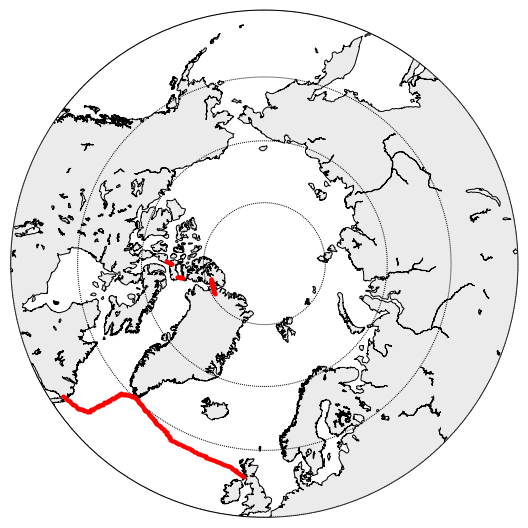

In [11]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=50,lon_0=0,resolution='l',round='True',ax=ax)
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(50.,90.,10.),labels=[True,True, True, True])
x_lon,y_lat=m(lon[:,:],lat[:,:])
cmap = plt.get_cmap('gray',25)
#mesh = m.pcolor(x_lon[:,:], y_lat[:,:],bathy[:,:],cmap=cmap)

m.plot(OSNAPlon,OSNAPlat,marker='.',color='red',latlon=True)
m.plot(Nareslon,Nareslat,marker='.',color='red',latlon=True)
m.plot(Barrowlon,Barrowlat,marker='.',color='red',latlon=True)
m.plot(Joneslon,Joneslat,marker='.',color='red',latlon=True)
#m.plot(Davislon,Davislat,marker='.',color='red',latlon=True)
#m.plot(Framlon,Framlat,marker='.',color='red',latlon=True)
#m.plot(BSOlon,BSOlat,marker='.',color='red',latlon=True)

plt.show

In [7]:
def transect_4yravg(formulation, trans):
    vol = sio.loadmat(formulation+trans,struct_as_record=False, squeeze_me=True)['myVol'][730:1022]
    salt = sio.loadmat(formulation+trans,struct_as_record=False, squeeze_me=True)['mySalt'][730:1022]
    heat = sio.loadmat(formulation+trans,struct_as_record=False, squeeze_me=True)['myHeat'][730:1022]
    
    timelen = len(vol[:])
    
    #convert the volume to sv
    vol_avg = (np.sum(vol)/timelen)/1000000.0
    salt_avg = np.sum(salt)/timelen
    heat_avg = np.sum(heat)/timelen
    
    return vol_avg, salt_avg, heat_avg

In [8]:
#time = sio.loadmat(slj+nares,struct_as_record=False, squeeze_me=True)['timeTag']
sljnares = np.zeros((3))
sljnares[:] = transect_4yravg(slj,nares+sj) 

cnares = np.zeros((3))
cnares[:] = transect_4yravg(control,nares+c)

pnares = np.zeros((3))
pnares[:] = transect_4yravg(polzin,nares+p)

#jones sound
sljjones = np.zeros((3))
sljjones[:] = transect_4yravg(slj,jones+sj) 

cjones = np.zeros((3))
cjones[:] = transect_4yravg(control,jones+c)

pjones = np.zeros((3))
pjones[:] = transect_4yravg(polzin,jones+p)

#fram strait
sljfram = np.zeros((3))
sljfram[:] = transect_4yravg(slj,fram+sj) 

cfram = np.zeros((3))
cfram[:] = transect_4yravg(control,fram+c)

pfram = np.zeros((3))
pfram[:] = transect_4yravg(polzin,fram+p)

#barrow strait
sljbarrow = np.zeros((3))
sljbarrow[:] = transect_4yravg(slj,barrow+sj) 

cbarrow = np.zeros((3))
cbarrow[:] = transect_4yravg(control,barrow+c)

pbarrow = np.zeros((3))
pbarrow[:] = transect_4yravg(polzin,barrow+p)

#davis strait
sljdavis = np.zeros((3))
sljdavis[:] = transect_4yravg(slj,davis+sj) 

cdavis = np.zeros((3))
cdavis[:] = transect_4yravg(control,davis+c)

pdavis = np.zeros((3))
pdavis[:] = transect_4yravg(polzin,davis+p)


#OSNAP transect
sljosnap = np.zeros((3))
sljosnap[:] = transect_4yravg(slj,osnap+sj) 

cosnap = np.zeros((3))
cosnap[:] = transect_4yravg(control2,osnap+c)

posnap = np.zeros((3))
posnap[:] = transect_4yravg(polzin,osnap+p)

In [15]:
print('volume, freshwater, heat')
print('Barrow')
print('c',cbarrow)
print('slj',sljbarrow)
print('p',pbarrow)
print('Jones')
print('c',cjones)
print('slj',sljjones)
print('p',pjones)
print('Nares')
print('c',cnares)
print('slj',sljnares)
print('p',pnares)
print('OSNAP')
print('c',cosnap)
print('slj',sljosnap)
print('p',posnap)

volume, freshwater, heat
Barrow
c [  0.62305808  19.79128131   1.86419046]
slj [  0.61644606  20.14025631   0.73550279]
p [  0.41081683  13.10218189   0.6432811 ]
Jones
c [ 0.1277127   4.1798254   0.36134551]
slj [  0.37719921  12.58924388   0.44923222]
p [ 0.21138711  6.97374087  0.32861504]
Nares
c [  0.98043979  32.45218663   3.3420495 ]
slj [  1.10942525  37.15608396   2.38825804]
p [  0.91510715  30.41765994   2.86097206]
OSNAP
c [   1.77510646   46.18076363 -490.22523612]
slj [   1.77411516   47.99379908 -495.00906676]
p [   1.76953508   46.23007497 -498.52662638]


In [9]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [12]:
def plotbar(sljdata, pdata, cdata,ax1,title):
    vol=np.array([cdata[0],sljdata[0],pdata[0]])
    salt=np.array([cdata[1],sljdata[1],pdata[1]])
    heat=np.array([cdata[2],sljdata[2],pdata[2]])

#     ax2 = ax1.twinx()
#     ax3 = ax1.twinx()
    #figure.suptitle(title, fontsize=20)
    ax1[0].set_ylabel("Volume Flux (Sv)",fontsize=18)
    ax1[1].set_ylabel("Freshwater flux (mSv)",fontsize=18)
    ax1[2].set_ylabel("Heat Flux (TW)",fontsize=18)


    N = 3
    width = 0.3
    ind0 = [0,0+width, 0+width+width]
    ind1 = [1,1+width, 1+width+width]
    ind2 = [2,2+width, 2+width+width]
    
    colors = ['r','b','g']

    bar0 = ax1[0].bar(ind0, vol, width,color=colors)
    ax1[0].set_xticks([])
    bar1 = ax1[1].bar(ind1, salt, width,color=colors)
    ax1[1].set_xticks([])
    bar2 = ax1[2].bar(ind2, heat, width,color=colors)
    ax1[2].set_xticks([])
    ax1[1].set_title(title,fontsize=20)

    plt.tight_layout()
    
    
    #ax1.set_title(title,fontsize=18)

#     ax1.set_ylim(0,vol.max()*1.2)
#     ax2.set_ylim(0,salt.max()*1.2)
#     ax3.set_ylim(0,heat.max()*2)

#     ax3.spines['right'].set_position(('outward', 60))
#     ax3.spines['right'].set_color('#624ea7')
#     ax3.yaxis.label.set_color('#624ea7')


#     ax2.yaxis.label.set_color('maroon')
#     ax2.spines['right'].set_color('maroon')
#     ax2.yaxis.label.set_color('maroon')

     


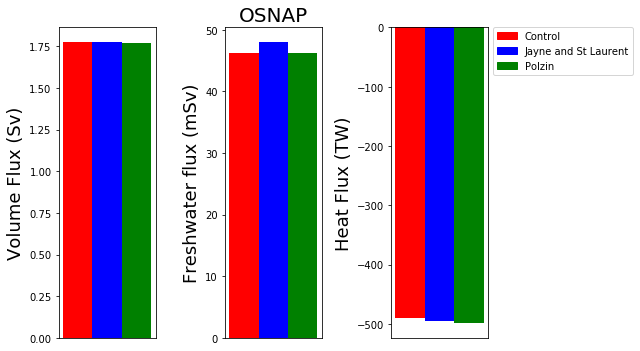

In [14]:
fig, ax1 = plt.subplots(1, 3, figsize=(7,5))
#plotbar(sljnares, pnares, cnares,ax1, 'Nares Strait')
#plotbar(sljjones, pjones, cjones,ax1, 'Jones Sound')
#plotbar(sljfram, pfram, cfram,ax1, 'Fram Strait')
#plotbar(sljbarrow, pbarrow, cbarrow,ax1, 'Barrow Strait')
#plotbar(sljdavis, pdavis, cdavis,ax1,'Davis Strait')
plotbar(sljosnap, posnap, cosnap,ax1,'OSNAP')

red_pat = mpatches.Patch(color='red',label='Control')
blue_pat = mpatches.Patch(color='blue',label='Jayne and St Laurent')
green_pat = mpatches.Patch(color='green',label='Polzin')

plt.legend(handles=[red_pat,blue_pat,green_pat],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [97]:
sljnares

array([  1.10942525,  37.15608396,   2.38825804])